# H&M Personalized Fashion Recommendations

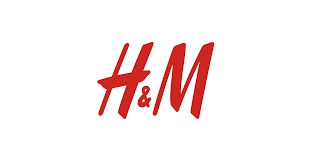 

For this challenge you are given the purchase history of customers across time, along with supporting metadata. Your challenge is to predict what articles each customer will purchase in the 7-day period immediately after the training data ends. Customer who did not make any purchase during that time are excluded from the scoring.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


The Data sets provided include:

    images/ - a folder of images corresponding to each article_id; images are placed in subfolders starting with the first three digits of the article_id; note, not all article_id values have a corresponding image.

    articles.csv - detailed metadata for each article_id available for purchase

    customers.csv - metadata for each customer_id in dataset

    sample_submission.csv - a sample submission file in the correct format

    transactions_train.csv - the training data, consisting of the purchases each customer for each date, as well as additional information. 

Duplicate rows correspond to multiple purchases of the same item. 

## Importing and Observing Data

In [2]:
articles_df = pd.read_csv("h-and-m-personalized-fashion-recommendations/articles.csv")
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [3]:
customers_df = pd.read_csv("h-and-m-personalized-fashion-recommendations/customers.csv")
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [4]:
transactions_df = pd.read_csv("h-and-m-personalized-fashion-recommendations/transactions_train.csv")
transactions_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


### Information about the Data 

Each dataframe with its column names, data types under each column and Overall parameters

In [5]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [6]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [7]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

   ## No Data 

In [8]:
def no_data(data):
    null = data.isnull()
    total = null.sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100)
    percent_sort = percent.sort_values(ascending = False)
    return pd.concat([total, percent_sort], axis=1, keys=['Total', 'Percent'])

In [9]:
no_data(articles_df)

,Total,Percent
detail_desc,416,0.394156
perceived_colour_master_name,0,0.000000
garment_group_name,0,0.000000
garment_group_no,0,0.000000
section_name,0,0.000000
section_no,0,0.000000
index_group_name,0,0.000000
index_group_no,0,0.000000
index_name,0,0.000000
index_code,0,0.000000


In [10]:
no_data(customers_df)

,Total,Percent
Active,907576,66.150819
FN,895050,65.237831
fashion_news_frequency,16009,1.166854
age,15861,1.156066
club_member_status,6062,0.441843
customer_id,0,0.000000
postal_code,0,0.000000


In [11]:
no_data(transactions_df)

,Total,Percent
t_dat,0,0.0
customer_id,0,0.0
article_id,0,0.0
price,0,0.0
sales_channel_id,0,0.0


In [12]:
from PIL import Image
i = 0
def plot_image_samples(plot_df):
#     row = int(len(plot_df)/3);
    
    image_path = "h-and-m-personalized-fashion-recommendations/images/"
    plt.figure(figsize=(17, 18))
    for each in plot_df['article_id']:
        each = ("0" + str(each))[-10:]
        plt.subplot(4, 4, i + 1)
        plt.axis('off')
        plt.title(f"{each[:3]}\n{each}.jpg")
        image = Image.open(f"{image_path}{each[:3]}/{each}.jpg")
#         try:
        plt.imshow(image)
#         except: print("Exception")
        plt.show()
        
        
        
# def plot_image_samples(image_article_df, product_group_name, cols=1, rows=-1):
#     image_path = "/h-and-m-personalized-fashion-recommendations/images/"
#     _df = image_article_df.loc[image_article_df.product_group_name==product_group_name]
#     article_ids = _df.article_id.values[0:cols*rows]
#     plt.figure(figsize=(2 + 3 * cols, 2 + 4 * rows))
#     for i in range(cols * rows):
#         article_id = ("0" + str(article_ids[i]))[-10:]
#         plt.subplot(rows, cols, i + 1)
#         plt.axis('off')
#         plt.title(f"{product_group_name} {article_id[:3]}\n{article_id}.jpg")
#         image = Image.open(f"{image_path}{article_id[:3]}/{article_id}.jpg")
#         plt.imshow(image)    

#     f, ax = plt.subplots(1, 5, figsize=(20,10))
#     i = 0
#     for _, data in plot_df.iterrows():
#         desc = articles_df[articles_df['article_id'] == data['article_id']]['detail_desc'].iloc[0]
        

### Frequently bought products 

Total number of transactions each customer made according to the "transactions_df"

In [13]:
purchased_c = transactions_df.pivot_table(columns=['article_id'], aggfunc='size')
purchased_c

article_id
108775015    10841
108775044     7250
108775051      215
110065001     1044
110065002      539
             ...  
952267001       41
952938001        9
953450001       17
953763001       35
956217002       21
Length: 104547, dtype: int64

In [14]:
items_purchased = transactions_df.pivot_table(columns=['customer_id'], aggfunc='size')
customers_df = pd.merge(customers_df, pd.DataFrame(items_purchased), on='customer_id')

In [15]:
purchased_df = pd.DataFrame(purchased_c)
purchased_df = purchased_df.sort_values("article_id")
articles_df = pd.merge(articles_df, purchased_df, on='article_id')
articles_df.head()


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,0
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,10841
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,7250
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,215
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",1044
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",539


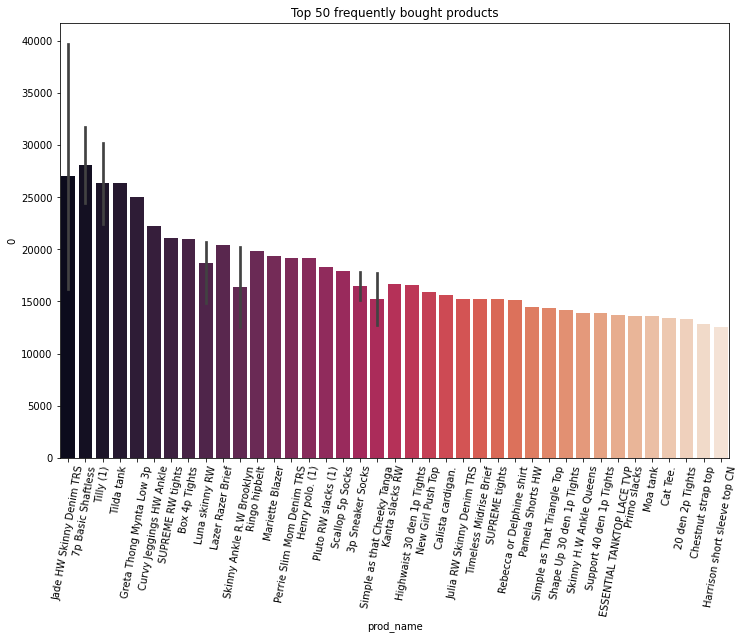

In [16]:
temp = articles_df.groupby(["prod_name"])[0].nunique()
# df = pd.DataFrame({'Product Group': temp.index,
#                    'Sold': temp.values
#                   })
df_1 = pd.DataFrame(articles_df["prod_name"],
                    articles_df[0])
# df
df_1 = articles_df.sort_values([0], ascending=False)
plt.figure(figsize = (12,8))
plt.title('Top 50 frequently bought products')

s = sns.barplot(x = 'prod_name', y=0,palette = 'rocket', data=df_1[:50])
s.set_xticklabels(s.get_xticklabels(),rotation=80)
locs, labels = plt.xticks()
plt.show()

### Items in the top 50 frequently bought products 

In [17]:
# plot_image_samples(df)
# df.head()

In [18]:
# articles_df = articles_df.rename(columns={'0': 'purchases_made'})

In [19]:

# customers_df = customers_df.rename(columns={'0': 'items_purchased'})
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,0
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,21
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,86
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,18
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,13


In [20]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,0
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,10841
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,7250
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,215
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",1044
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",539


In [21]:
articles_df=articles_df.sort_values(0)
articles_df.tail()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,0
70124,759871002,759871,Tilda tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,D,Divided,2,Divided,80,Divided Complements Other,1002,Jersey Basic,"Cropped, fitted top in cotton jersey with narr...",26329
24808,610776002,610776,Tilly (1),255,T-shirt,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,T-shirt in lightweight jersey with a rounded h...,30199
1711,372860001,372860,7p Basic Shaftless,302,Socks,Socks & Tights,1010016,Solid,9,Black,...,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Fine-knit trainer socks in a soft cotton blend.,31718
53833,706016002,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,71,Light Blue,...,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...,35043
53832,706016001,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,9,Black,...,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...,50287


In [22]:


plt.figure(figsize=(10, 10))
articles_df['article_id']= articles_df['article_id'].astype(str)
# plt.bar(articles_df['article_id'],articles_df[0][])


<Figure size 720x720 with 0 Axes>

In [23]:
customers_df.sort_values(0).tail()


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,0
1090960,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,1.0,1.0,ACTIVE,Regularly,68.0,771dc009c1a3bab320696643c3396319f1b1dd67ee9de7...,1237
885174,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,1.0,1.0,ACTIVE,Regularly,61.0,c46e53a04e81a44fecaf0ec64ae353bfb3abc91f510e79...,1361
391840,49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...,NaN,NaN,ACTIVE,NONE,28.0,ab724d6cb2340bd9c5294fd7f2811349f6509a27a8bc5c...,1364
962395,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,1.0,1.0,ACTIVE,Regularly,25.0,4acdec769091cb0bc94cfd3324843156dbc572a7281ae4...,1441
1011710,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,NaN,NaN,ACTIVE,NONE,31.0,67851f0456e7070c20c713fe0f47eb15bcbf2a59d13b79...,1895


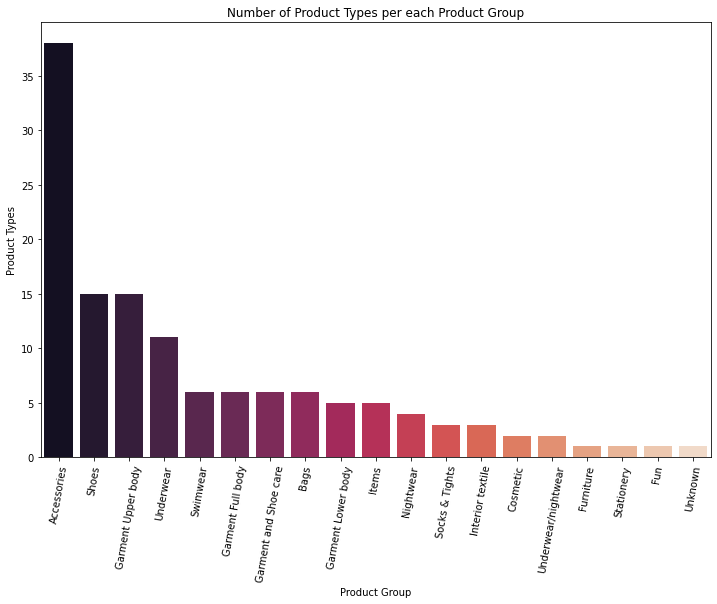

In [24]:
temp = articles_df.groupby(["product_group_name"])["product_type_name"].nunique()
df_2 = pd.DataFrame({'Product Group': temp.index,
                   'Product Types': temp.values
                  })
df_2 = df_2.sort_values(['Product Types'], ascending=False)
plt.figure(figsize = (12,8))
plt.title('Number of Product Types per each Product Group')

s = sns.barplot(x = 'Product Group', y="Product Types",palette="rocket", data=df_2)
s.set_xticklabels(s.get_xticklabels(),rotation=80)
locs, labels = plt.xticks()
plt.show()

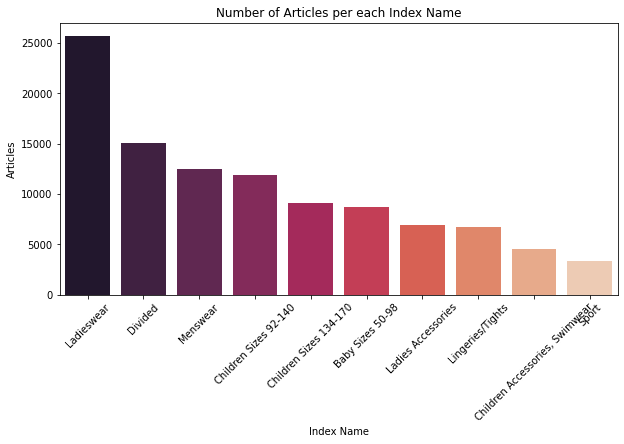

In [25]:
temp = articles_df.groupby(["index_name"])["article_id"].nunique()
df_3 = pd.DataFrame({'Index Name': temp.index,
                   'Articles': temp.values
                  })
df_3 = df_3.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (10,5))
plt.title(f'Number of Articles per each Index Name')

s = sns.barplot( y='Articles',x = 'Index Name',palette="rocket", data=df_3)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
locs, labels = plt.xticks()

plt.show()

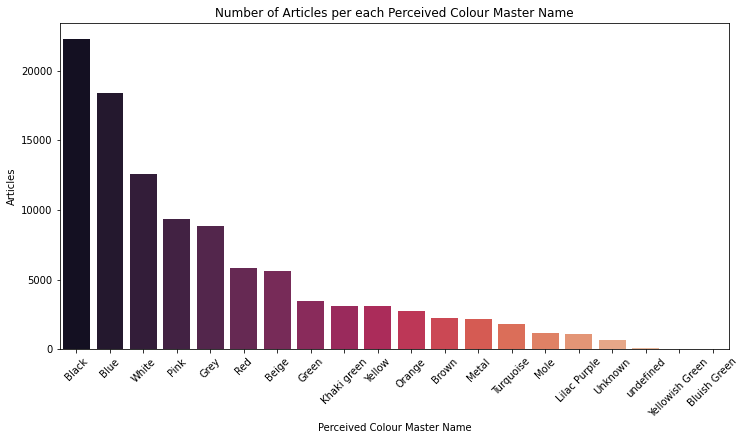

In [26]:
temp = articles_df.groupby(["perceived_colour_master_name"])["article_id"].nunique()
df_4 = pd.DataFrame({'Perceived Colour Master Name': temp.index,
                   'Articles': temp.values
                  })
df_4 = df_4.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (12,6))
plt.title(f'Number of Articles per each Perceived Colour Master Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Perceived Colour Master Name', y="Articles",palette="rocket", data=df_4)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
locs, labels = plt.xticks()
plt.show()

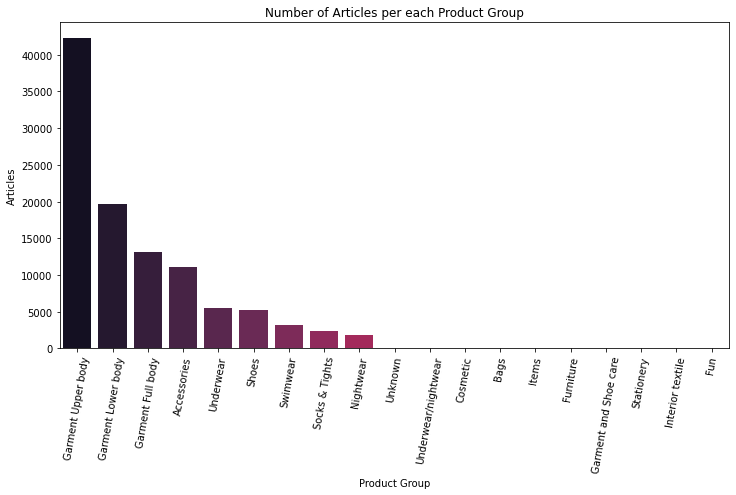

In [27]:
temp = articles_df.groupby(["product_group_name"])["article_id"].nunique()
df_5 = pd.DataFrame({'Product Group': temp.index,
                   'Articles': temp.values
                  })
df_5 = df_5.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (12,6))
plt.title('Number of Articles per each Product Group')

s = sns.barplot(x = 'Product Group', y="Articles",palette="rocket", data=df_5)
s.set_xticklabels(s.get_xticklabels(),rotation=80)
locs, labels = plt.xticks()
plt.show()

# Customers by AGE

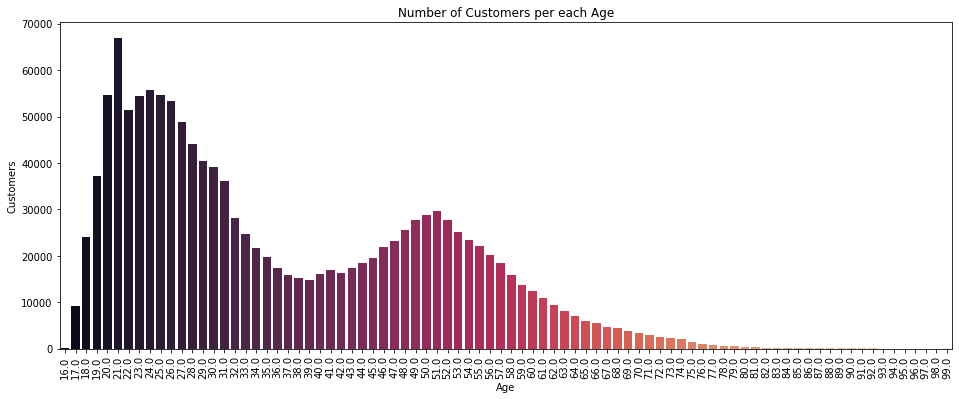

In [28]:
temp = customers_df.groupby(["age"])["customer_id"].count()
df_6 = pd.DataFrame({'Age': temp.index,
                   'Customers': temp.values
                  })
df_6 = df_6.sort_values(['Age'], ascending=False)
plt.figure(figsize = (16,6))
plt.title(f'Number of Customers per each Age')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Age', y="Customers", palette="rocket",data=df_6)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [29]:
temp = transactions_df.groupby(["customer_id"])["price"].sum()

df_7 = pd.merge(temp,customers_df[['customer_id','age']],on='customer_id', how='left')
df_7


temp = df_7.groupby(["age"])["price"].sum()
newtemp = df_7.groupby(["age"])["price"].mean()


df_8 = pd.DataFrame({'CustomersAge': temp.index,
                   'AvgSpent': temp.values
                  })
df_8 = df_8.sort_values(['AvgSpent'], ascending=False)

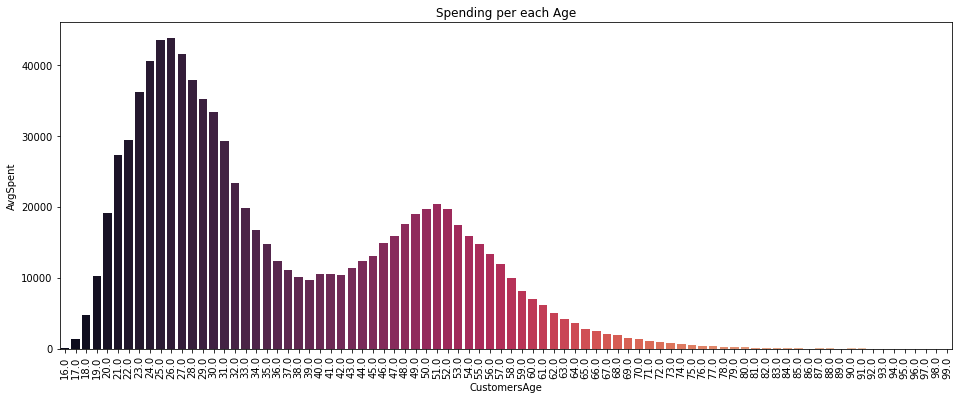

In [30]:
plt.figure(figsize = (16,6))
plt.title(f'Spending per each Age')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'CustomersAge', y="AvgSpent", palette="rocket", data=df_8)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [31]:
df_9 = pd.DataFrame({'CustomersAge': newtemp.index,
                   'AvgSpent': newtemp.values
                  })
df_9 = df_9.sort_values(['AvgSpent'], ascending=False)

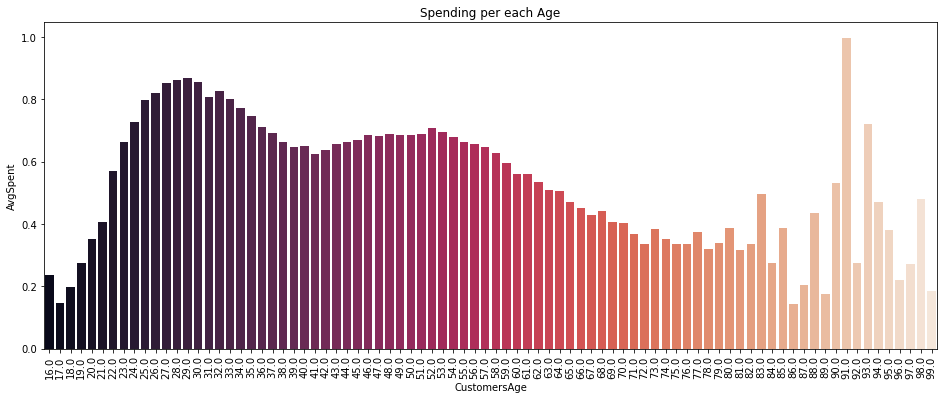

In [32]:
plt.figure(figsize = (16,6))
plt.title(f'Spending per each Age')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'CustomersAge', y="AvgSpent",palette="rocket", data=df_9)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

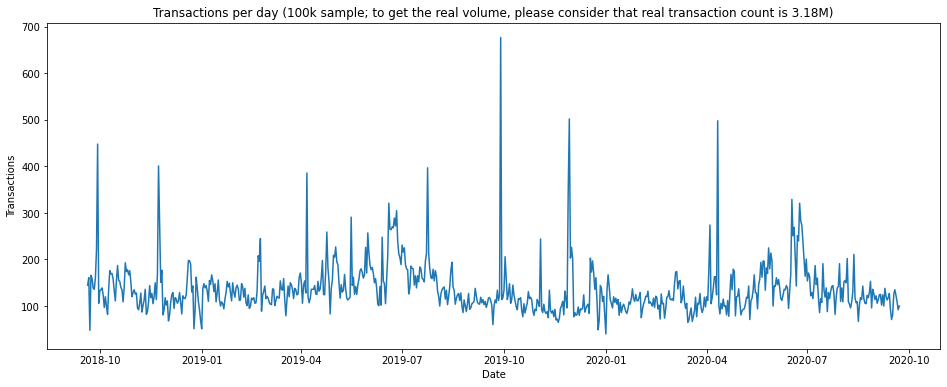

In [33]:
from datetime import datetime

df = transactions_df.sample(100_000).groupby(["t_dat"])["article_id"].count().reset_index()
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.columns = ["Date", "Transactions"]
fig, ax = plt.subplots(1, 1, figsize=(16,6))
plt.plot(df["Date"], df["Transactions"])
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.title(f"Transactions per day (100k sample; to get the real volume, please consider that real transaction count is {round(transactions_df.shape[0]/10.e6,2)}M)")
plt.show()

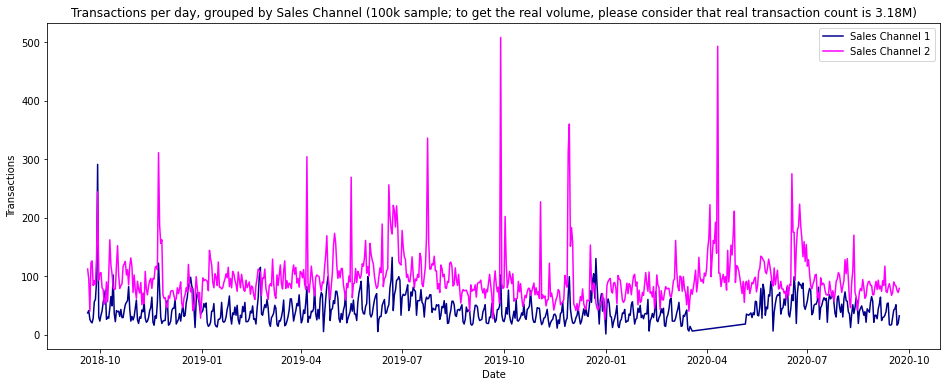

In [34]:
df_11 = transactions_df.sample(100_000).groupby(["t_dat", "sales_channel_id"])["article_id"].count().reset_index()
df_11["t_dat"] = df_11["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df_11.columns = ["Date", "Sales Channel Id", "Transactions"]
fig, ax = plt.subplots(1, 1, figsize=(16,6))
g1 = ax.plot(df_11.loc[df_11["Sales Channel Id"]==1, "Date"], df_11.loc[df_11["Sales Channel Id"]==1, "Transactions"], label="Sales Channel 1", color="Darkblue")
g2 = ax.plot(df_11.loc[df_11["Sales Channel Id"]==2, "Date"], df_11.loc[df_11["Sales Channel Id"]==2, "Transactions"], label="Sales Channel 2", color="Magenta")
plt.xlabel("Date")
plt.ylabel("Transactions")
ax.legend()
plt.title(f"Transactions per day, grouped by Sales Channel (100k sample; to get the real volume, please consider that real transaction count is {round(transactions_df.shape[0]/10.e6,2)}M)")
plt.show()

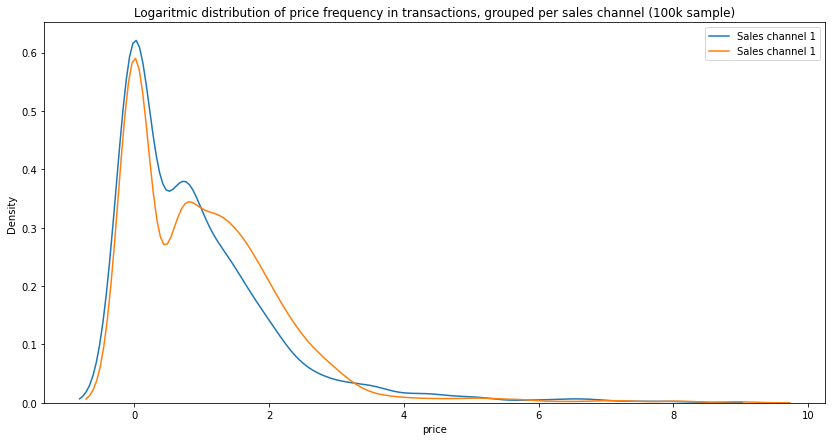

In [35]:
df_12 = transactions_df.sample(100_000)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
sns.kdeplot(np.log(df_12.loc[df_12["sales_channel_id"]==1].price.value_counts()))
sns.kdeplot(np.log(df_12.loc[df_12["sales_channel_id"]==2].price.value_counts()))
ax.legend(labels=['Sales channel 1', 'Sales channel 1'])
plt.title("Logaritmic distribution of price frequency in transactions, grouped per sales channel (100k sample)")
plt.show()

In [36]:
# temp = transactions_df.groupby(["customer_id"])["price"].mean()

# df = pd.merge(temp,customers_df[['customer_id','age']],on='customer_id', how='left')
# df
# # df = pd.DataFrame({'Customers': temp.index,
# #                    'TotalSpent': temp.values
# #                   })
# df = df.sort_values(['price'], ascending=False)
# plt.figure(figsize = (16,6))
# plt.title(f'Spending per each Age')
# sns.set_color_codes("pastel")
# s = sns.barplot(x = 'age', y="price", data=df)
# s.set_xticklabels(s.get_xticklabels(),rotation=90)
# locs, labels = plt.xticks()
# plt.show()

Although there are some correlations in the features and categories provided, the description of each product gives us an overall understanding of what the product is and how it might be related to other products by description

This thought made me lean towards a bias less comparision

Any other form of typical comparision such as recommending clothes based on age gender location of the customer are all different kinds of biases being incorporated into the algorithm. Without much acknowledgement or consideration most of us procceed towards such methods of suggestions. 

     Why can't we suggest a gender neutral clothing styles.
     
     One age group of people don't necessarily have to go for similar clothing choices
     
     Trends matter
     
     But this method of comparing clothes purely based on description is a new take
     
 Overall Analysis:
     
   Description of a product example:
   

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from itertools import combinations
new_gramdf = pd.DataFrame(pd.DataFrame([articles_df['article_id'], articles_df['detail_desc'].str.split(' ')]).T)
new_gramdf['detail_desc'] = new_gramdf['detail_desc'].fillna("").astype('str')

# tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tf = TfidfVectorizer(analyzer=lambda s: (c for i in range(1,4)
                     for c in combinations(s.split('|'), r=i)))
# 

# tfidf_matrix
new_gramdf.shape



(104547, 2)

In [38]:
# type(new_gramdf)

tfidf_matrix = tf.fit_transform(new_gramdf['detail_desc']) #[:10000])

In [39]:
tfidf_matrix.shape
tfidf_matrix

<104547x43034 sparse matrix of type '<class 'numpy.float64'>'
	with 104547 stored elements in Compressed Sparse Row format>

In [40]:
# from sklearn.metrics.pairwise import linear_kernel

In [41]:
# feature_names = tf.get_feature_names()

# dense = tfidf_matrix.todense()
# denselist = dense.tolist()
# df = pd.DataFrame(denselist, columns=feature_names)
# df.head()

In [42]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim[:4][:4]

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
articles = new_gramdf['article_id']
indices = pd.Series(new_gramdf.index, index = new_gramdf['article_id'])

At th

In [60]:
def clothing_recommendations(article_id, cosine_sim):
    idx = indices[article_id]
    print(idx)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[15:20]
    art_indices = [i[0] for i in sim_scores]
    return articles.iloc[art_indices]

923134001
Joggers in sweatshirt fabric made from a cotton blend. Relaxed fit with an **elasticated**, drawstring **waist**, discreet **side pockets** and elasticated hems.

In [ ]:
image = Image.open(f"{image_path}{each[:3]}/{each}.jpg")

In [61]:
# for each in range(1,104547):
df = pd.DataFrame(clothing_recommendations(23134, cosine_sim).head(7))
    


15862


In [46]:
# new_gramdf.iloc["article_id"]

In [56]:
df

,article_id
82918,811205001
5347,494472005
82920,811205005
18915,581293001
9943,537463003


In [48]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,0
27822,621245001,621245,Benny bootcut,272,Trousers,Garment Lower body,1010016,Solid,9,Black,...,H,Children Sizes 92-140,4,Baby/Children,76,Kids Girl,1005,Jersey Fancy,Trousers in glossy jersey with elastication co...,1
27761,620887001,620887,MARLOW knitted top,252,Sweater,Garment Upper body,1010010,Melange,7,Grey,...,G,Baby Sizes 50-98,4,Baby/Children,44,Baby Essentials & Complements,1006,Woven/Jersey/Knitted mix Baby,Baby Exclusive. Fine-knit jumper in a soft sil...,1
9921,537346015,537346,Ridge,252,Sweater,Garment Upper body,1010010,Melange,71,Light Blue,...,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1003,Knitwear,Oversized jumper in a soft knit with a deep V-...,1
7301,512568001,512568,Madras tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,D,Divided,2,Divided,53,Divided Collection,1005,Jersey Fancy,Short top in soft jersey with narrow shoulder ...,1
44216,679622001,679622,RESORT SORREL TEE,255,T-shirt,Garment Upper body,1010001,All over pattern,9,Black,...,F,Menswear,3,Menswear,30,Men Other 2,1001,Unknown,T-shirt in patterned jersey.,1


811205001	Sleeveless playsuit in a viscose weave with elastication and a flounce at the top, an elasticated seam at the waist and side pockets.


494472005	Outdoor	Padded parka with a detachable lined hood with a faux fur trim and a stand-up collar. Zip and wind flap with press-studs down the front, handwarmer pockets, flap front pockets, a zipped sleeve pocket and inner ribbing at the cuffs. Lined.

811205005	Sleeveless playsuit in a viscose weave with elastication and a flounce at the top, an elasticated seam at the waist and side pockets.


581293001	Pull-on trousers in cotton twill with an elasticated drawstring waist, side pockets and welt back pockets. Tapered legs with decorative seams and elasticated hems.


537463003	Velour jacket with a motif front and back and a lined hood, zip down the front, pockets in the side seams and ribbing at the cuffs and hem.

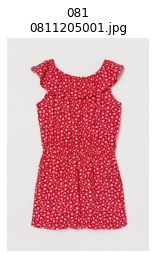

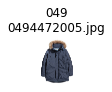

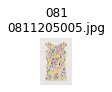

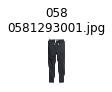

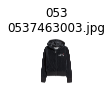

In [49]:
plot_image_samples(df)

In [50]:
new_df = pd.DataFrame(columns = ['articles_recommended'])
for i in range(1,20000):
    val = list(clothing_recommendations(i, cosine_sim))
    
    
    new_df.at[i,'articles_recommended'] = val

In [51]:
new_df.head()

,articles_recommended
1,"[537439001, 537461001, 581238002, 811205001, 4..."
2,"[494472001, 770221001, 597069001, 609648001, 5..."
3,"[811205005, 581293001, 537463003, 851659002, 8..."
4,"[597069001, 609648001, 537439001, 537461001, 5..."
5,"[494472005, 811205005, 581293001, 537463003, 8..."


In [52]:
articles_df['article_id'][1]

'108775044'

In [53]:
new_df['articles_recommended'][999]

['811205005', '581293001', '537463003', '851659002', '810931001']

In [54]:
# plot_image_samples(pd.DataFrame({'article_id':new_df['articles_recommended'][999]}))



ValueError: num must be 1 <= num <= 16, not 20000

<Figure size 1224x1296 with 0 Axes>

In [ ]:
customers_df